# Aplica variantes del algoritmo k-medias y otros métodos particionales 
En este notebook aprenderás a ejecutar varios métodos de agrupamiento particional, como alternativa al uso de k-medias. Seguiremos trabajando con las dos librerías Python utilizadas la semana anterior, *PyClustering* y *scikit-learn*, ya que cada una de ellas tiene implementaciones de métodos diferentes.
## 1. Cambiar la inicialización de k-medias en ***PyClustering***
En la primera parte del *notebook* utilizaremos la librería *PyClustering*, cuya [documentación en línea](https://pyclustering.github.io/docs/0.10.1/html/index.html) nos ayudará a configurar y ejecutar variantes del método k-medias. En esta librería, cada método de agrupamiento está definido en su propio subpaquete dentro de *cluster*. En este primer apartado, solo necesitamos importar un nuevo tipo de inicialización denominada *k-means++*.

In [1]:
# La primera vez que se vaya a ejecutar este notebook es necesario instalar la librería pyclustering
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import random_center_initializer, kmeans_plusplus_initializer
import numpy as np
import matplotlib.pyplot as plt

Vamos a trabajar con un conjunto de datos precargado en *PyClustering*, donde los grupos están bastante dispersos. Para ver su distribución, podemos utilizar un visor proporcionado por la propia librería.

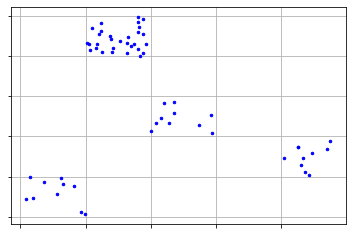

In [2]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer
datos = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
visor = cluster_visualizer()
visor.append_cluster(datos, color="blue")
grafico_datos = visor.show()


La semana anterior vimos que antes de ejecutar el algoritmo k-medias en *PyClustering* necesitamos generar los centroides iniciales. Aparte de la inicialización aleatoria, la librería nos da la opción de utilizar una variante de k-medias denominada [*k-means++*](https://pyclustering.github.io/docs/0.10.1/html/db/de0/classpyclustering_1_1cluster_1_1center__initializer_1_1kmeans__plusplus__initializer.html#details). Este método proporciona una forma mejorada para determinar los centroides antes de ejecutar *k-means* u otro algoritmo de su misma "familia".

In [3]:
k = 4
centroides_iniciales_optimizados = kmeans_plusplus_initializer(datos, k, random_state=0).initialize()
print(centroides_iniciales_optimizados)

[array([1.060471, 4.167168]), array([4.751436, 1.878438]), array([0.926445, 0.126412]), array([2.161529, 2.47041 ])]


Además de asignar los centroides obtenidos por este nuevo método, vamos a limitar el número de iteraciones del algoritmo a 5 con el parámetro *itermax*. De esta forma, podremos apreciar más claramente la influencia de los centroides iniciales, ya que el algoritmo tendrá pocas iteraciones para converger hacia los mejores centroides.

In [4]:
alg_kmeans_optimizado = kmeans(datos, centroides_iniciales_optimizados, itermax=5)

Podemos representar gráficamente la ubicación de estos centroides para ver que se ajustan con bastante precisión a los grupos que se observan en el conjunto de datos, ya que esta inicialización pre-analiza la distancia entre puntos.

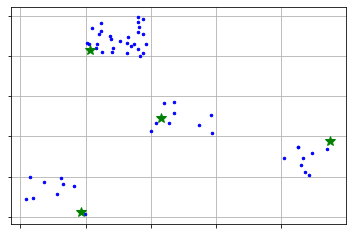

In [5]:
visor.append_cluster(centroides_iniciales_optimizados, marker='*', markersize=10, color='green')
grafico_datos = visor.show()

Vamos a inicializar también el conjunto de centroides de manera aleatoria para comparar cómo afecta al análisis de grupos con k-medias. Utilizamos el parámetro *random_state* para fijar una semilla aleatoria. Con ello, aseguramos que cualquier nueva ejecución de la función nos devolverá la misma inicialización de centroides.

In [6]:
centroides_iniciales_aleatorios = random_center_initializer(datos, k, random_state=0).initialize()
print(centroides_iniciales_aleatorios)
alg_kmeans_aleatorio = kmeans(datos, centroides_iniciales_aleatorios, itermax=5)


[[1.060471, 4.167168], [2.916867, 2.523174], [1.632979, 4.069506], [1.526876, 4.37241]]


Comprobamos con el visor cuál es la ubicación de estos centroides aleatorios.

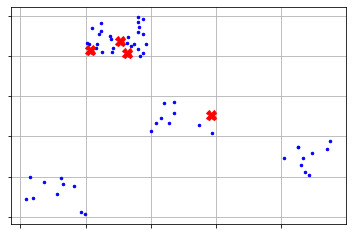

In [7]:
visor = cluster_visualizer()
visor.append_cluster(datos, color="blue")
visor.append_cluster(centroides_iniciales_aleatorios, marker='X', markersize=10, color="red")
grafico_datos = visor.show()

A continuación, ejecutamos el análisis de grupos para cada instancia del algoritmo k-medias.

In [8]:
alg_kmeans_optimizado.process()
alg_kmeans_aleatorio.process()

Para ver el resultado, utilizamos el visor de grupos disponible en el propio algoritmo k-medias, que nos muestra de forma conjunta los grupos y los centroides. A pesar de realizar pocas iteraciones, el resultado agrupa de forma correcta las instancias del conjunto de datos.

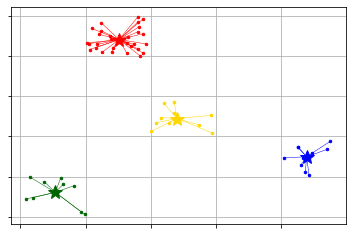

In [9]:
grafico_optimizado = kmeans_visualizer.show_clusters(datos, alg_kmeans_optimizado.get_clusters(), alg_kmeans_optimizado.get_centers())

Si hacemos lo mismo con el algoritmo cuyos centroides iniciales eran aleatorios, vemos claramente que no es capaz de encontrar una distribución tan adecuada como en el caso anterior.

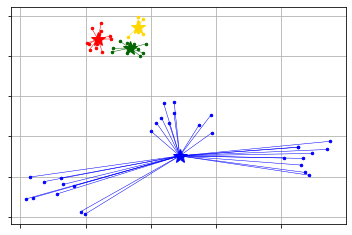

In [10]:
grafico_aleatorio = kmeans_visualizer.show_clusters(datos, alg_kmeans_aleatorio.get_clusters(), alg_kmeans_aleatorio.get_centers())

## 2. Utilizar variantes de k-medias en ***PyClustering***
Hemos visto como cambiar uno de los elementos que afectan al algoritmo k-medias, su inicialización. En este apartado vamos a ver otros algoritmos que son variantes de k-medias puesto que modifican la forma en la que se determinan los centroides. Estos otros algoritmos son *k-medians* y *k-medoids*.

In [11]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmedoids import kmedoids

En primer lugar, vamos a generar un conjunto de datos de dos variables y 50 puntos generados de forma aleatoria.

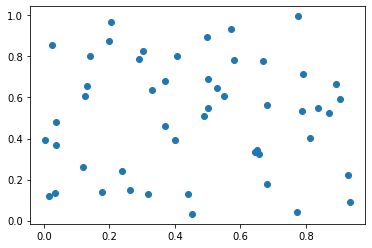

In [12]:
tam = 50
datos = np.random.random((tam,2))
x = datos[0:tam,0]
y = datos[0:tam,1]
plt.scatter(x, y)
plt.show()


Para k-medias, podemos realizar la inicialización optimizada como en el apartado anterior. A continuación, ejecutamos el algoritmo y visualizamos los grupos. Vamos a utilizar un semilla aleatoria para poder replicar esta inicialización más adelante.

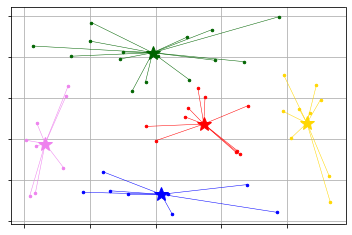

In [13]:
k = 5
centroides_iniciales = random_center_initializer(datos,k,random_state=0).initialize()
alg_kmeans = kmeans(datos, centroides_iniciales)
alg_kmeans.process()
grafico = kmeans_visualizer.show_clusters(datos, alg_kmeans.get_clusters(), alg_kmeans.get_centers())

Para k-medians, podemos utilizar los mismos centroides iniciales para comprobar que el cambio en la asignación de grupos se debe al re-cálculo de centroides. En este algoritmo, el centroide se calcula como la mediana en lugar de la media.

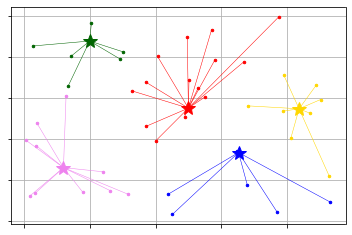

In [14]:
medians_iniciales = centroides_iniciales
alg_kmedians = kmedians(datos, medians_iniciales)
alg_kmedians.process()
grafico = kmeans_visualizer.show_clusters(datos, alg_kmedians.get_clusters(), alg_kmedians.get_medians())

Para k-medoids, los centroides van a corresponderse con puntos reales del conjunto de datos.En primer lugar, tenemos que indicarle al generador de centroides iniciales que devuelva los índices de los puntos elegidos en lugar de sus coordenadas.

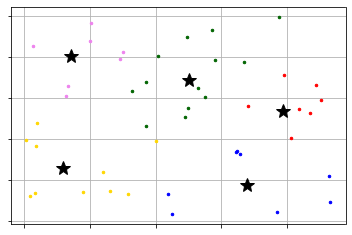

In [15]:
medoids_iniciales = random_center_initializer(datos,k,random_state=0).initialize(return_index=True)
alg_kmedoids = kmedoids(datos, medoids_iniciales)
alg_kmedoids.process()

visor = cluster_visualizer()
visor.append_clusters(alg_kmedoids.get_clusters(), datos)
visor.append_cluster(alg_kmedoids.get_medoids(), datos, markersize=14, marker='*', color='black')
grafico = visor.show()

Los centroides finales de *k-medoids* son índices del conjunto de datos, aquellos elegidos como representantes de cada grupo. Por el contrario, en k-medias y *k-medians* se calculan en base a la asignación de grupos, por lo que se devuelven en forma de coordenadas. Lo más habitual es que no coincidan con puntos reales del conjunto de datos, aunque en el caso de *k-medians* es más posible que alguno sí lo sea. Podemos comprobarlo con el sigeuiente código.

In [16]:
# Centroides en k-means
print('Centroides en k-medias: punto, ¿está en el conjunto de datos?')
centroides_kmeans = alg_kmeans.get_centers()
for i in range(0, len(centroides_kmeans)):
  c = centroides_kmeans[i]
  print(c, c in datos)

# Centroides en k-medians
print('Centroides en k-medians: punto, ¿está en el conjunto de datos?')
centroides_kmedians = alg_kmedians.get_medians()
for i in range(0, len(centroides_kmedians)):
  c = centroides_kmedians[i]
  print(c, c in datos)

# Centroides en k-medoids
print('Centroides en k-medias: índice, punto')
centroides_kmedoids = alg_kmedoids.get_medoids()
for i in range(0, len(centroides_kmedoids)):
  c = centroides_kmedoids[i]
  print(c, datos[c])

Centroides en k-medias: punto, ¿está en el conjunto de datos?
[0.5474219271581706, 0.47295603991387053] False
[0.4173589367284391, 0.13038206162352178] False
[0.3910926905247418, 0.8206250565827348] False
[0.8619554193056057, 0.4773053102294392] False
[0.0633526732022492, 0.3781290966386379] False
Centroides en k-medians: punto, ¿está en el conjunto de datos?
[0.5003087413886455, 0.5505343449739775] True
[0.653350812512387, 0.3341268179250509] False
[0.19921744512945871, 0.8777179492754879] True
[0.838066815121833, 0.547343681605751] True
[0.11922080012629555, 0.26060134447574534] True
Centroides en k-medias: índice, punto
24 [0.78838879 0.53570866]
20 [0.67975079 0.17792088]
19 [0.50226417 0.68987619]
27 [0.1192208  0.26060134]
4 [0.14237381 0.80364869]


## 3. Cambiar la inicialización de k-medias en ***scikit-learn***
Al igual que en *PyClustering*, es posible cambiar el método de inicialización para el algoritmo k-medias en *scikit-learn*. En este apartado veremos cómo hacerlo. Lo primero que necesitamos es importar el algoritmo.

In [17]:
from sklearn.cluster import KMeans

A continuación, creamos nuestro conjunto de datos.

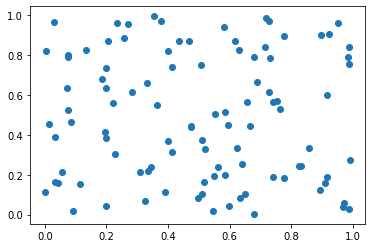

In [18]:
tam = 100
datos = np.random.random((tam,2))
x = datos[0:tam,0]
y = datos[0:tam,1]
plt.scatter(x, y)
plt.show()

Lo siguiente que tenemos que hacer es crear la instancia del algoritmo k-medias. Si consultamos la [documentación de referencia](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), Uno de sus parámetros es *init*. Este parámetro puede tomar dos valores: *'random** y *'k-means++'*. Actualmente, el valor por defecto es *k-means++*, pues se ha visto que funciona mejor que el método aleatorio. No obstante, podemos indicarlo expresamente en la llamada la función. Además, vamos a reducir el número máximo de iteraciones (parámetro *max_iter*) para ver más claramente el beneficio de esta inicialización frente a la aleatoria.

In [19]:
k = 4
alg_kmeans_plusplus = KMeans(n_clusters=k, random_state=1, init='k-means++', max_iter=5)
alg_kmeans_plusplus.fit(datos)

KMeans(max_iter=5, n_clusters=4, random_state=1)

Hacemos el mismo proceso, pero indicando que la inicialización sea aleatoria.

In [20]:
alg_kmeans = KMeans(n_clusters=k, random_state=1, init='random', max_iter=5)
alg_kmeans.fit(datos)

KMeans(init='random', max_iter=5, n_clusters=4, random_state=1)

Vamos a definir una función que nos permita visualizar una agrupación determinada, de forma que podamos comparar la asignación de cada algoritmo.

In [21]:
def visualizar_grupos_sklearn(x, y, etiquetas, centroides, k):
  plt.scatter(x, y, c=etiquetas)
  colores = np.arange(0, k)
  plt.scatter(centroides[0:k,0], centroides[0:k,1], marker="*", c=colores)
  plt.show()


Ya podemos visualizar los resultados de k-medias y de k-medias++.

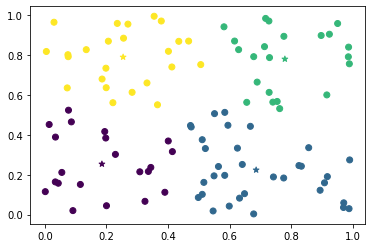

In [22]:
visualizar_grupos_sklearn(x, y, alg_kmeans_plusplus.labels_, alg_kmeans_plusplus.cluster_centers_, k)

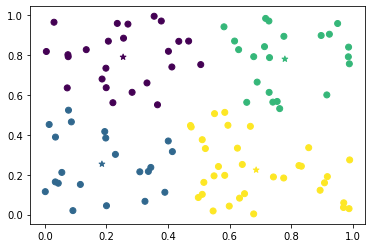

In [23]:
visualizar_grupos_sklearn(x, y, alg_kmeans.labels_, alg_kmeans.cluster_centers_, k)

## 4. Ejecutar AffinityPropagation en ***scikit-learn***
[AffinityPropagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation) es otro algoritmo particional que está disponible en la librería *scikit-learn*. Este algoritmo, a diferencia de *k-medias*, no require indicar el número de grupos a descubrir (parámetro *k*). 

In [24]:
from sklearn.cluster import AffinityPropagation

Para ejecutarlo, seguimos el mismo procedimiento de configuración que con otros algoritmos de esta librería.

In [25]:
alg_aff_prop = AffinityPropagation()
alg_aff_prop.fit(datos)

AffinityPropagation()

Para saber cuántos grupos ha identificado, podemos recuperar los el vector de centroides (*exemplars*) y ver su dimensión. Además, como estos centroides son puntos reales del conjunto de datos, podemos recuperar también el índice de la instancia del conjunto de datos con el cual se corresponde cada uno.

In [26]:
exemplars = alg_aff_prop.cluster_centers_
num_grupos = len(exemplars)
print(num_grupos)
indices = alg_aff_prop.cluster_centers_indices_
print(indices)

9
[ 5 10 11 16 37 39 50 89 93]


 Por úlitmo, probamos a visualizar la partición devuelta por este algoritmo con nuestra función de visualización.

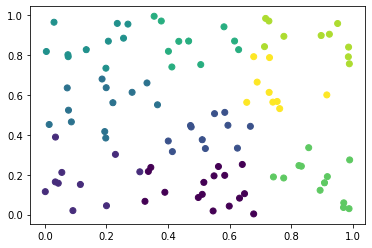

In [27]:
visualizar_grupos_sklearn(x, y, alg_aff_prop.labels_, exemplars, num_grupos)